# <center> Resolvendo o problema de Maximal Independent Set com PLI.
    
## <center> Carolina Monteiro e José Arthur

## <center> Abril de 2022

## Definições:

 Diremos que dois vértices são independentes quando eles não são vizinhos um do outro, isto é, quando não há aresta que os una.

 Um conjunto independente de um grafo é um conjunto de vértices tal que todos os vértices contidos nele são independentes.

 O problema de Maximal Independent Set, ou Conjunto Independente Máximo, consiste em, dado um grafo, encontrar o conjunto independente que contém os vértices com a maior soma de pesos. Neste trabalho, vamos resolver este problema com Programação Linear Inteira.

## Modelando o problema

 Primeiro, tendo o grafo, construimos a matriz A de adjacência entre os vértices como abaixo (isso exige alguma ordenação entre os vértices, que é arbitráaria, mas será  mesma usada para todo o resto da modelagem):

$$A=
\begin{bmatrix}
a_{11}& a_{12} & ... & a_{1n} \\
a_{21}& a_{22} & ... & a_{2n} \\
\vdots& \vdots & \ddots & \vdots \\
a_{n1}& a_{n2} & ... & a_{nn} \\
\end{bmatrix}$$ ,

$$ \mbox{onde } a_{ij}=
\begin{cases} 
1, & \mbox{se } v_i \mbox{ e } v_j \mbox{ são adjacentes;} \\
0, & \mbox{se não.}
\end{cases}
$$

 Construímos o vetor P de pesos, segundo a ordenação que fizemos ao construir  matriz. O i-ésimo elemento do vetor corresponde ao peso do vértice i.

$$P=
\begin{bmatrix}
p_1 \\
p_2 \\
\vdots \\
p_n
\end{bmatrix}$$

 A matriz A e o vetor P são constantes.

 Criamos  também um vetor N de variáveis binárias $n_i$, descritas abaixo:

$$N=\begin{bmatrix}
n_1 \\
n_2 \\
\vdots \\
n_n
\end{bmatrix}$$

$$ \mbox{onde } n_i=
\begin{cases} 
1, & \mbox{se } v_i \mbox{ faz parte do conjunto independente;} \\
0, & \mbox{se não.}
\end{cases}
$$

 Desta maneira, podemos multiplicar M por n e conseguir:

$$MN=\begin{bmatrix}
m_1 \\
m_2 \\
\vdots \\
m_n
\end{bmatrix}$$

$$ \mbox{onde } m_i = \sum _{j=1}^{n} \mathbb{1} \{ a_{ij} \in N \}$$

 e $\mathbb{1} \{ a_{ij} \in N \}$ é a variável indicadora que assume o valor 1 quando $a_{ij}$ pertence a N, isto é, quando faz parte do conjunto independente.

 Notemos que $m_i$ denota o número de vizinhos do vértice i que pertencem a N. Queremos que um elemento do conjunto não tenha nenhum vizinho dentro do conjunto também, o que pode ser traduzido por:

$$<MN,N>=0$$

 Quando o i-ésimo elemento de N for igual a 1, ou seja, quando o i-ésimo vértice pertencer ao conjunto, queremos que o número de vizinhos dele seja zero. Nesse caso o $N_i * m_i = 0$. Quando o i-ésimo elemento de N for igual a 0, tanto faz o número de vizinhos dele, mas $N_i * m_i = 0$ também. Esntão no fim das contas, queremos que $N_i * m_i = 0$ sempre e  aí $<MN,N>=0$. 

$$<MN,N>=0 \Longleftrightarrow \sum _{i=1}^{n} (a_{i1}*N_1 + a_{i2}*N_2+ ... + a_{in}*N_n)*N_i = 0$$

 Como todas as variáveis envolvidas são binárias, os produtos aí escritos são todos iguais a 1 ou a 0. Como a soma de tudo deve dar 0, então cada um dos termos deve ser igual a 0. 

$$\sum _{i=1}^{n} (a_{i1}*N_1 + a_{i2}*N_2+ ... + a_{in}*N_n)*N_i = 0 \Longleftrightarrow a_{ij}*N_j*N_i=0, \forall i \in [n], \forall j \in [n]$$

$$[n]={1,2,3,...,n}$$

 Mais uma vez, como todas as variáveis envolvidas são binárias, um produto desses ser igual a 0 é o equivalente a alguma delas ser igual a 0. Mas se uma delas é igual a 0, então a soma deve ser menor ou igual a 2 (caso contrário a soma teria que ser 3 ou mais, mas isso só seria possível com todas as variáveis iguais a 1, pois todos os produtos são entre três variáveis):

$$ a_{ij}*N_j*N_i=0, \Longleftrightarrow a_{ij} + N_j + N_i \leq 2$$

 Assim, por fim, nossas restrições são do tipo:

$$a_{ij} + N_j + N_i \leq 2, \forall i \in [n], \forall j \in [n] $$

 E o problema pode ser escrito como:

$$max \{ <N,P> \}$$

$$ \mbox{Sujeito à: } a_{ij} + N_j + N_i \leq 2, \forall i \in [n], \forall j \in [n] $$

Como exemplo, temos o grafo abaixo, com os pesos já definidos:

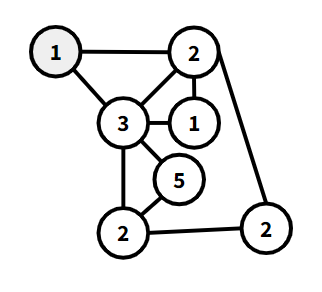

Para facilitar o entendimento, vamos numerar os nós:

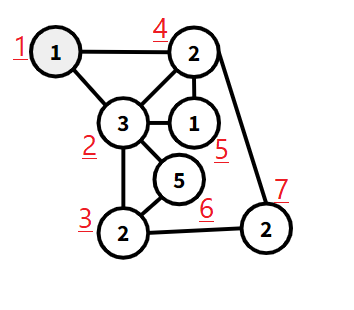

Com esses índices, a matriz de adjacências será


$ A =  \begin{bmatrix}
    0 & 1 & 0 & 1 & 0 & 0 & 0 \\
    1 & 0 & 1 & 1 & 1 & 1 & 0 \\
    0 & 1 & 0 & 0 & 0 & 1 & 1 \\
    1 & 1 & 0 & 0 & 1 & 0 & 1 \\
    0 & 1 & 0 & 1 & 0 & 0 & 0 \\
    0 & 1 & 1 & 0 & 0 & 0 & 0 \\
    0 & 0 & 1 & 1 & 0 & 0 & 0 \\
\end{bmatrix}  $,

e o vetor de pesos será $ P = \begin{bmatrix}
1 & 3 & 2 & 2 & 1 & 5 & 2
\end{bmatrix}'.
$

Agora implementaremos nosso modelo, da forma como definimos acima.

In [3]:
using JuMP
using GLPK

In [10]:
function Maximal_Independent_Set(A,P,n)
    m = Model(GLPK.Optimizer)
    @variable(m, N[i = 1:n], Bin) #se o nó i entra no M_I_S ou não
    @constraint(m, C[i=1:n,j=1:n], A[i,j] + N[i] + N[j] <= 2)
    @objective(m, Max, P'N)
    optimize!(m)
    return(m)
end;

In [11]:
A = [
    0 1 0 1 0 0 0
    1 0 1 1 1 1 0
    0 1 0 0 0 1 1
    1 1 0 0 1 0 1
    0 1 0 1 0 0 0
    0 1 1 0 0 0 0
    0 0 1 1 0 0 0
]  
P = [1,3,2,2,1,5,2]; 

In [12]:
modelo = Maximal_Independent_Set(A,P,7);

In [13]:
@show objective_value(modelo);

objective_value(modelo) = 9.0


In [14]:
@show value.(modelo[:N]);

value.(modelo[:N]) = [1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0]


O valor ótimo da função objetivo é $9$ e o Conjunto Independente Máximo é $\{1,5,6,7\}$.

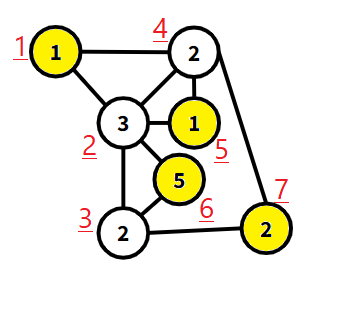